# Stage 3: Python Fundamentals

In [1]:
import time

## 1. Numpy Operations

In [2]:
import numpy as np

In [3]:
list = [2, 9, 4, 17, 24, 8, 15, 29, 10, 43, 71, 60]
arr = np.array(list)
arr

array([ 2,  9,  4, 17, 24,  8, 15, 29, 10, 43, 71, 60])

In [4]:
# Loop execution
loop_start_time = time.time()

loop_arr = [i/10 for i in arr]
print(loop_arr)

loop_end_time = time.time()
loop_execution_time = loop_end_time - loop_start_time
print("Loop execution time:", loop_execution_time)

[np.float64(0.2), np.float64(0.9), np.float64(0.4), np.float64(1.7), np.float64(2.4), np.float64(0.8), np.float64(1.5), np.float64(2.9), np.float64(1.0), np.float64(4.3), np.float64(7.1), np.float64(6.0)]
Loop execution time: 0.0005838871002197266


In [5]:
# Vectorized execution
vectorized_start_time = time.time()

vectorized_arr = arr / 10
print(vectorized_arr)

vectorized_end_time = time.time()
vectorized_execution_time = vectorized_end_time - vectorized_start_time
print("Vectorized execution time:", vectorized_execution_time)

[0.2 0.9 0.4 1.7 2.4 0.8 1.5 2.9 1.  4.3 7.1 6. ]
Vectorized execution time: 0.004048347473144531


## 2. Dataset Loading

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("data/raw/starter_data.csv")
df.head()


,category,value,date
0,A,10,2025-08-01
1,B,15,2025-08-02
2,A,12,2025-08-03
3,B,18,2025-08-04
4,C,25,2025-08-05


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  10 non-null     object
 1   value     10 non-null     int64 
 2   date      10 non-null     object
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes


## 3. Summary Statistics

In [8]:
df.describe()

,value
count,10.000000
mean,17.600000
std,7.381659
min,10.000000
25%,12.250000
50%,14.500000
75%,23.250000
max,30.000000


In [10]:
df_grouped_category = df.groupby('category').mean(numeric_only=True).reset_index()
df_grouped_category

,category,value
0,A,11.500000
1,B,15.666667
2,C,27.666667


## 4. Save Outputs

In [12]:
df_grouped_category.to_csv('data/processed/summary.csv', index=False)

Matplotlib is building the font cache; this may take a moment.


<Axes: xlabel='category'>

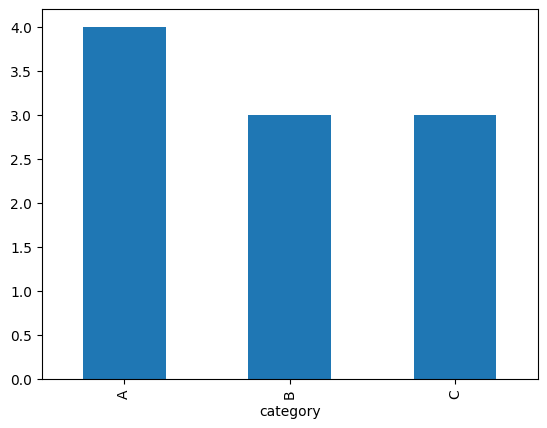

In [15]:
import matplotlib.pyplot as plt
df["category"].value_counts().plot(kind="bar")

In [16]:
plt.savefig('data/processed/plot.png')

<Figure size 640x480 with 0 Axes>

## 5. Reusable Functions

In [17]:
def get_summary_stats(df: pd.DataFrame) -> pd.DataFrame:
    df_grouped_category = df.groupby('category').mean(numeric_only=True).reset_index()
    return df_grouped_category


In [19]:
from pathlib import Path
import sys

PROJECT_ROOT = Path.cwd().parent.resolve()
SRC = PROJECT_ROOT / "src"
sys.path.append(str(SRC))

In [22]:
try:
    import src.utils as utils
    print("Imported utils.")
except ImportError as e:
    print("Error:", e)
    raise

Imported utils.


In [23]:
utils.get_summary_stats(df)

,category,value
0,A,11.500000
1,B,15.666667
2,C,27.666667
